In [1]:
import pandas as pds 
import subprocess
import json
import matplotlib.pyplot as plt
import numpy as np

def get_experiments_from_path(start_path):
    experiment_dot_json_paths = subprocess.getoutput('find {} | grep experiment.json'.format(start_path))

    experiment_dot_json_paths = experiment_dot_json_paths.split('\n')
    experiments = []
    for p in experiment_dot_json_paths:
        with open(p) as f:
            experiments.append(json.load(f))
    
    return experiments

# CORES Dataset, CNN, One source Domain

In [2]:
cores_cnn_3_raw = get_experiments_from_path("../cores_cnn_3")

print("parameters", cores_cnn_3_raw[0]["parameters"].keys())
print("results", cores_cnn_3_raw[0]["results"].keys())

parameters dict_keys(['experiment_name', 'lr', 'device', 'seed', 'dataset_seed', 'desired_classes', 'batch_size', 'n_epoch', 'patience', 'criteria_for_best', 'normalize_source', 'normalize_target', 'x_net', 'NUM_LOGS_PER_EPOCH', 'RESULTS_DIR', 'EXPERIMENT_JSON_PATH', 'LOSS_CURVE_PATH', 'BEST_MODEL_PATH', 'num_examples_per_class_per_domain', 'source_domains', 'target_domains'])
results dict_keys(['source_test_label_accuracy', 'source_test_label_loss', 'target_test_label_accuracy', 'target_test_label_loss', 'source_val_label_accuracy', 'source_val_label_loss', 'target_val_label_accuracy', 'target_val_label_loss', 'total_epochs_trained', 'total_experiment_time_secs', 'confusion', 'per_domain_accuracy'])


In [6]:
cores_cnn_3_processed = []

for e in cores_cnn_3_raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    cores_cnn_3_processed.append(p)

df = pds.DataFrame(cores_cnn_3_processed)

In [4]:
df = df.groupby("source_domains").mean()
df

,2,5,3,4,1
source_domains,,,,,
[1],0.490848,0.425319,0.463626,0.437788,0.983678
[2],0.983678,0.707782,0.847953,0.760138,0.484152
[3],0.809825,0.743786,0.977241,0.739862,0.491071
[4],0.788772,0.698955,0.729032,0.972874,0.442411
[5],0.714152,0.984828,0.737558,0.691754,0.446429


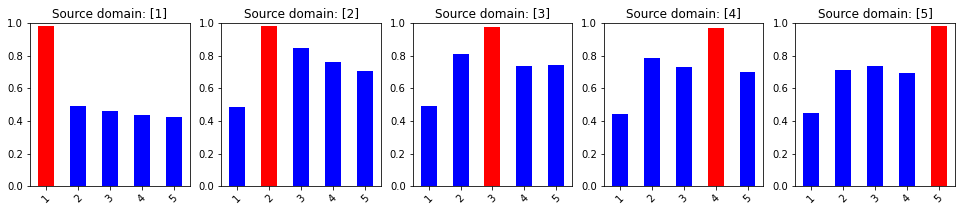

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 3]

domain_colors = {True: 'r', False: 'b'}
for i, (name, row) in enumerate(df.iterrows()):
    row = row.sort_index()
    ax = plt.subplot(1,6, i+1)
    ax.set_title("Source domain: {}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)

# CORES, PTN, One source domain

In [14]:
raw = get_experiments_from_path("../cores_ptn_1")
processed = []

for e in raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    processed.append(p)

df = pds.DataFrame(processed)
df

,experiment_name,source_domains,5,1,2,3,4
0,cores_ptn_1,[5],0.998563,0.984195,0.965517,0.972701,0.936782
1,cores_ptn_1,[5],0.982759,0.948276,0.962644,0.926724,0.931034
2,cores_ptn_1,[2],0.897989,0.919540,0.978448,0.952586,0.880747
3,cores_ptn_1,[1],0.926724,0.979885,0.936782,0.945402,0.880747
4,cores_ptn_1,[2],0.932471,0.913793,0.984195,0.959770,0.915230
5,cores_ptn_1,[1],0.958333,0.989943,0.938218,0.922414,0.912356
6,cores_ptn_1,[4],0.971264,0.956897,0.974138,0.965517,0.989943
7,cores_ptn_1,[3],0.932471,0.958333,0.945402,0.987069,0.902299
8,cores_ptn_1,[1],0.929598,0.987069,0.932471,0.933908,0.910920
9,cores_ptn_1,[3],0.961207,0.966954,0.962644,0.994253,0.955460


In [15]:
df = df.groupby("source_domains").mean()
df

,5,1,2,3,4
source_domains,,,,,
[1],0.939368,0.984770,0.938793,0.934483,0.902874
[2],0.925000,0.921839,0.985920,0.956034,0.895402
[3],0.940805,0.958333,0.965517,0.990805,0.929885
[4],0.979023,0.971839,0.978736,0.977011,0.987644
[5],0.989080,0.962356,0.969828,0.949425,0.928448


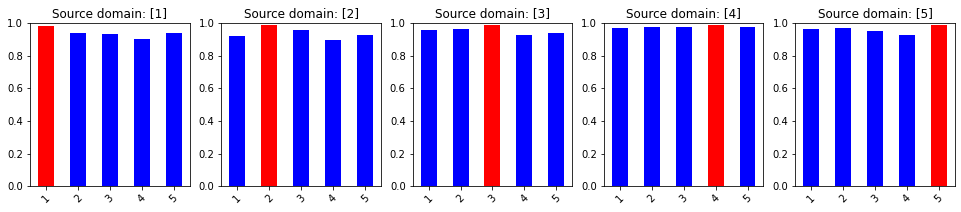

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 3]

domain_colors = {True: 'r', False: 'b'}
for i, (name, row) in enumerate(df.iterrows()):
    row = row.sort_index()
    ax = plt.subplot(1,6, i+1)
    ax.set_title("Source domain: {}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)